In [3]:
## IMPORT DATA
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import os 
import sklearn
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sys


import gzip
import os
import copy
import random


from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from matplotlib.pyplot import figure

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 


from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor

In [4]:
borrower=pd.read_csv('borrower_table.csv')

In [5]:
loan=pd.read_csv('loan_table.csv')

In [6]:
borrower.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [7]:
loan.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN
3,580653,other,2012-06-27,1,1.0
4,172419,business,2012-05-21,1,0.0


In [8]:
borrower.describe()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
count,101100.000000,101100.000000,46153.000000,46153.000000,101100.000000,94128.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000
mean,499666.826726,0.543492,0.899291,0.364332,4112.743818,0.724140,1799.617616,3177.150821,0.658675,21020.727992,41.491632,3.864748
std,288662.006929,0.498107,0.300946,0.481247,2129.121462,0.186483,1400.545141,2044.448155,0.474157,18937.581415,12.825570,2.635491
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,250333.750000,0.000000,1.000000,0.000000,2700.000000,0.600000,834.000000,1706.000000,0.000000,0.000000,32.000000,2.000000
50%,499885.000000,1.000000,1.000000,0.000000,4100.000000,0.730000,1339.000000,2673.000000,1.000000,21500.000000,41.000000,3.000000
75%,749706.250000,1.000000,1.000000,1.000000,5500.000000,0.860000,2409.000000,4241.000000,1.000000,35300.000000,50.000000,6.000000
max,999987.000000,1.000000,1.000000,1.000000,13500.000000,1.090000,10641.000000,13906.000000,1.000000,97200.000000,79.000000,8.000000


In [9]:
loan.isnull().sum()

loan_id             0
loan_purpose        0
date                0
loan_granted        0
loan_repaid     53446
dtype: int64

In [10]:
loan['loan_repaid']=loan['loan_repaid'].fillna(0)

In [11]:
loan.isnull().sum()

loan_id         0
loan_purpose    0
date            0
loan_granted    0
loan_repaid     0
dtype: int64

In [12]:
borrower.isnull().sum()

loan_id                                                0
is_first_loan                                          0
fully_repaid_previous_loans                        54947
currently_repaying_other_loans                     54947
total_credit_card_limit                                0
avg_percentage_credit_card_limit_used_last_year     6972
saving_amount                                          0
checking_amount                                        0
is_employed                                            0
yearly_salary                                          0
age                                                    0
dependent_number                                       0
dtype: int64

In [13]:
borrower.fillna({'fully_repaid_previous_loans': 0, 'currently_repaying_other_loans': 0, 'avg_percentage_credit_card_limit_used_last_year':0}, inplace=True)


In [14]:
borrower.isnull().sum()

loan_id                                            0
is_first_loan                                      0
fully_repaid_previous_loans                        0
currently_repaying_other_loans                     0
total_credit_card_limit                            0
avg_percentage_credit_card_limit_used_last_year    0
saving_amount                                      0
checking_amount                                    0
is_employed                                        0
yearly_salary                                      0
age                                                0
dependent_number                                   0
dtype: int64

In [15]:
median=borrower['avg_percentage_credit_card_limit_used_last_year'].median()
borrower.fillna({'avg_percentage_credit_card_limit_used_last_year':median}, inplace=True)


## EDA



In [21]:
import seaborn as sns


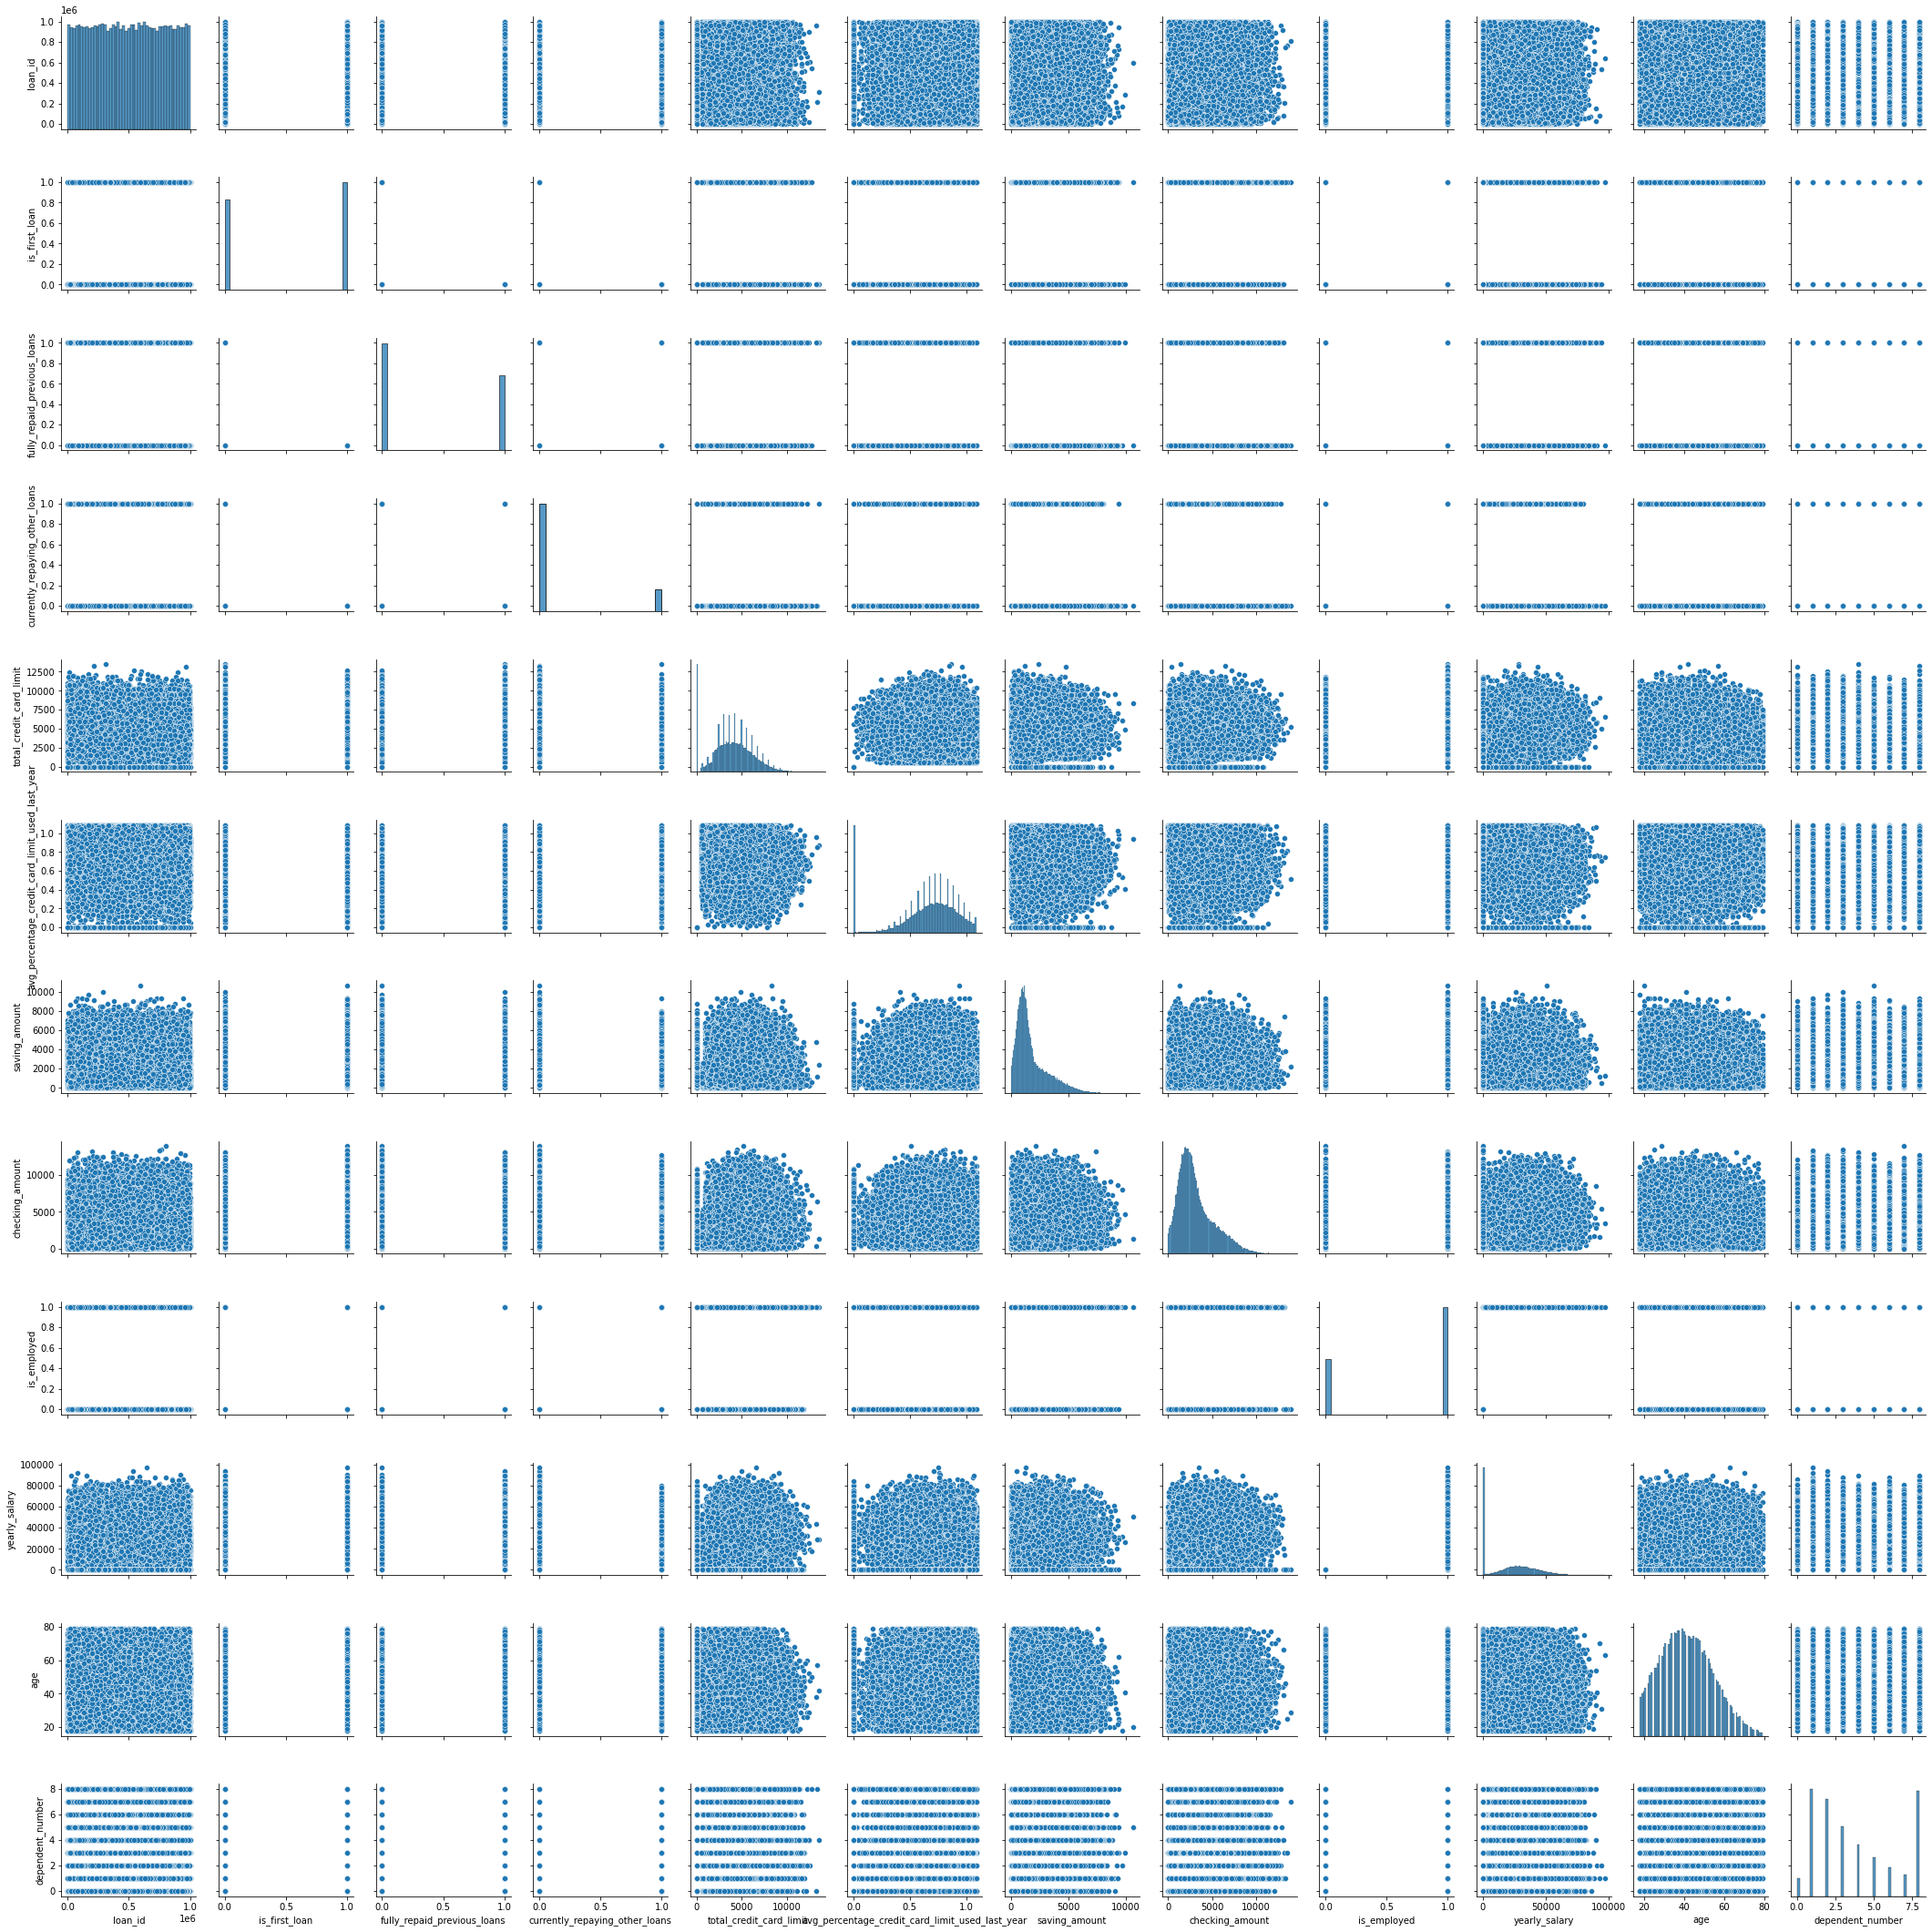

In [41]:
sns.pairplot(borrower)

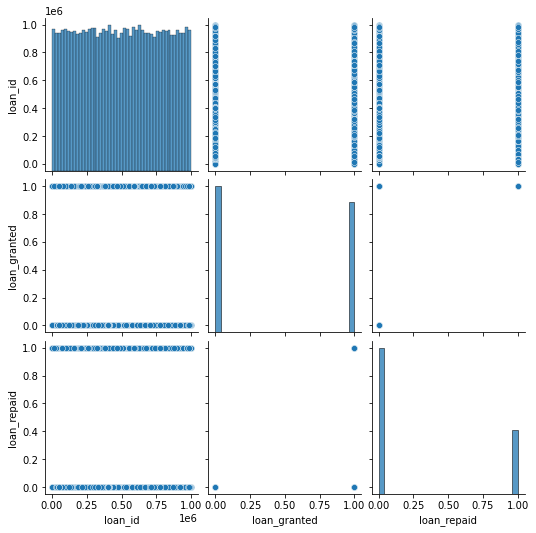

In [23]:
sns.pairplot(loan)

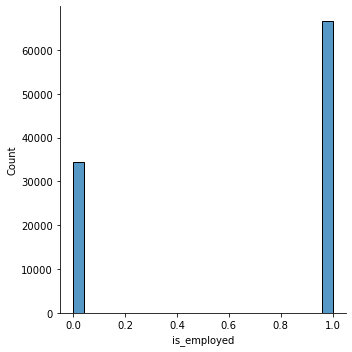

In [25]:
sns.displot(borrower['is_employed'])

<AxesSubplot:>

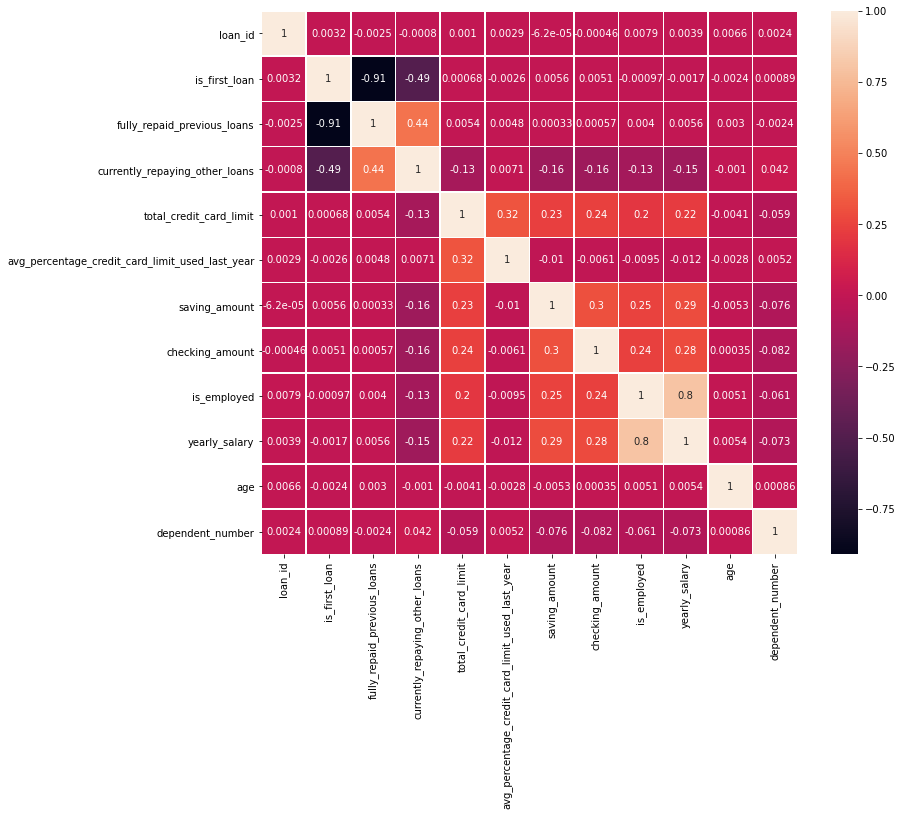

In [16]:
plt.figure(figsize = (12,10))
corelation=borrower.corr()
sns.heatmap(corelation,xticklabels =corelation.columns, yticklabels=corelation.columns, annot=True, linewidths=.5)

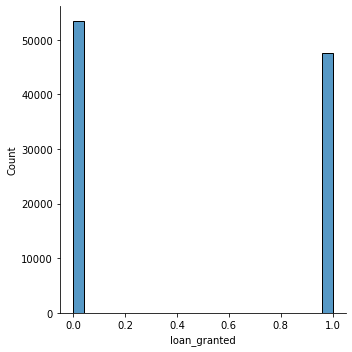

In [43]:
sns.displot(loan['loan_granted'])

Build a model which is better than the bank model. Assume that:
If you grant the loan and the it doesn’t get repaid, you lose 1.
If you grant the loan and the it does get repaid, you gain 1
If you don’t grant the loan, you gain 0.

Using the rules above, compare bank profitability vs your model profitability.


Describe the impact of the most important variables on the prediction. Also, focus on the variable “is_employed”, which describes whether the borrower is employed when she asks for the loan. How does this variable impact the model? Explain why.


Are there any other variables you’d like to include in the model?

In [17]:
df = pd.merge(borrower, loan, on=['loan_id'], how='left')


In [18]:
df.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid
0,289774,1,0.0,0.0,8000,0.49,3285,1073,0,0,47,3,business,2012-01-31,0,0.0
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1,investment,2012-11-02,0,0.0
2,135565,1,0.0,0.0,6900,0.82,2085,3422,1,24500,38,8,other,2012-07-16,1,1.0
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1,investment,2012-06-05,0,0.0
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1,emergency_funds,2012-11-28,0,0.0


<AxesSubplot:xlabel='is_employed', ylabel='loan_repaid'>

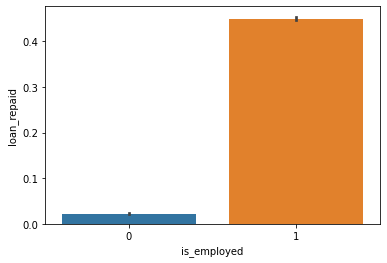

In [44]:
sns.barplot(x='is_employed', y='loan_repaid', data=df)


In [32]:
loan.columns

Index(['loan_id', 'loan_purpose', 'date', 'loan_granted', 'loan_repaid'], dtype='object')

#model

In [20]:
from sklearn.preprocessing import LabelEncoder


In [21]:
# encoding 'loan_purpose'
encoder = LabelEncoder()
df['loan_purpose'] = encoder.fit_transform(df['loan_purpose'])

In [22]:
df['loan_purpose'].unique()

array([0, 3, 4, 1, 2])

In [23]:
# define categorical features
categorical_feature = ['loan_purpose', 'is_first_loan', 'fully_repaid_previous_loans', 
                       'currently_repaying_other_loans', 'is_employed']
target = 'loan_repaid'

df[categorical_feature] = df[categorical_feature].astype('category')
df[target] = df[target].astype('category')

In [53]:
df_repaid=df[df['loan_repaid']==1]

In [57]:
df_repaid['loan_repaid'].unique()

[1.0]
Categories (1, float64): [1.0]

In [55]:
x=df_repaid.drop(['loan_granted', 'date','loan_repaid'],axis=1)
y=df_repaid['loan_granted']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)


In [56]:
x.columns

Index(['loan_id', 'is_first_loan', 'fully_repaid_previous_loans',
       'currently_repaying_other_loans', 'total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number', 'loan_purpose'],
      dtype='object')

In [58]:
rf=RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True)

In [59]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_features=3, oob_score=True)

In [62]:
rf.oob_score_


1.0

In [63]:
rf.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [60]:
#let's print OOB accuracy and confusion matrix
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(y_train, rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [32]:
# Rearrange feature names so they match the sorted feature importances
important_features = pd.Series(data=rf.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)

In [33]:
important_features

loan_repaid                                        0.0
loan_purpose                                       0.0
dependent_number                                   0.0
age                                                0.0
yearly_salary                                      0.0
is_employed                                        0.0
checking_amount                                    0.0
saving_amount                                      0.0
avg_percentage_credit_card_limit_used_last_year    0.0
total_credit_card_limit                            0.0
currently_repaying_other_loans                     0.0
fully_repaid_previous_loans                        0.0
is_first_loan                                      0.0
loan_id                                            0.0
dtype: float64

<AxesSubplot:>

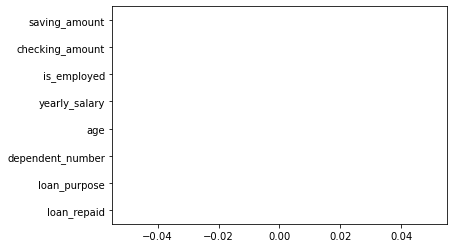

In [50]:
important_features.nlargest(8).plot(kind='barh')
